In [46]:
from datascience import Table
import csv
import numpy as np

# Data-driven Analysis of NBA Draft Adages
---
## Objective
---
Every year, the teams in the NBA draft amateur players with the hope that they will become future star players. Over the years, many widely held assumptions have formed about which types of players to draft. This project will take a closer statistical look at these adages and try to conclude if they are legitimate or merely myth.

## Data
---
I collected data from two main sources.

1) I downloaded all draft data from Basketball Reference from the years 1990-2015. An appropriate subset will be used for each analysis. 
2) stats.nba.com has a wealth of NBA Combine measurements. This anthropometric data is at the core of some of these draft adages. 

The `draft_data` table includes summary statistics on all drafted players that do a good job describing how a player has performed over their career.

The `anthro_data` table includes measurements of NBA prospects taken pre-draft, including height, weight, body fat percentage, wingspan, standing reach, etc.

In [71]:
draft_data = None

for i in range(1999, 2016):
    with open('data/drafts/draft_NBA_' + str(i) + '_stats.csv', 'rt', encoding='ascii') as f:
        reader = csv.reader(f)
        j = 0
        for row in reader:
            if j == 0 and i == 1999:
                draft_data = Table(['Year'] + row)
            elif j != 0:
                draft_data = draft_data.with_row([str(i)] + row)
            j += 1
            
anthro_data = None

for i in range(2000, 2012):
    with open('data/combines/anthro_' + str(i) + '.csv', 'rt', encoding='ascii') as f:
        reader = csv.reader(f)
        j = 0
        for row in reader:
            if j == 0 and i == 2000:
                anthro_data = Table(['Year'] + row)
            else:
                if row[5] != 'POSITION':
                    anthro_data = anthro_data.with_row([str(i)] + row)
                else:
                    j-=1
            j += 1

In [127]:
draft_data

Year,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,WS,WS/48,BPM,VORP
1999,1,1,CHI,Elton Brand,Duke University,17,1058,34910,16827,9040,2184,.500,.095,.736,33.0,15.9,8.5,2.1
1999,2,2,VAN,Steve Francis,University of Maryland,9,576,21632,10446,3215,3473,.429,.341,.797,37.6,18.1,5.6,6.0
1999,3,3,CHH,Baron Davis,University of California Los Angeles,13,835,28592,13447,3183,6025,.409,.320,.711,34.2,16.1,3.8,7.2
1999,4,4,LAC,Lamar Odom,University of Rhode Island,14,961,32131,12781,8059,3554,.463,.312,.693,33.4,13.3,8.4,3.7
1999,5,5,TOR,Jonathan Bender,,8,262,3847,1453,582,170,.417,.340,.763,14.7,5.5,2.2,0.6
1999,6,6,MIN,Wally Szczerbiak,Miami University,10,651,20052,9195,2602,1532,.485,.406,.860,30.8,14.1,4.0,2.4
1999,7,7,WAS,Richard Hamilton,University of Connecticut,14,921,29559,15708,2852,3125,.449,.346,.852,32.1,17.1,3.1,3.4
1999,8,8,CLE,Andre Miller,University of Utah,17,1304,40268,16278,4795,8524,.461,.217,.807,30.9,12.5,3.7,6.5
1999,9,9,PHO,Shawn Marion,University of Nevada Las Vegas,16,1163,40097,17700,10101,2198,.484,.331,.810,34.5,15.2,8.7,1.9
1999,10,10,ATL,Jason Terry,University of Arizona,17,1285,39855,18408,3120,5258,.444,.379,.845,31.0,14.3,2.4,4.1


In [75]:
anthro_data

Year,TEMP_PLAYER_ID,PLAYER_ID,FIRST_NAME,LAST_NAME,PLAYER_NAME,POSITION,HEIGHT_WO_SHOES,HEIGHT_WO_SHOES_FT_IN,HEIGHT_W_SHOES,HEIGHT_W_SHOES_FT_IN,WEIGHT,WINGSPAN,WINGSPAN_FT_IN,STANDING_REACH,STANDING_REACH_FT_IN,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH
2000,,2124,Malik,Allen,Malik Allen,PF-C,80.25,6' 8.25'',,,271,86.5,7' 2.5'',109.0,9' 1'',,,
2000,,12019,Harold,Arceneaux,Harold Arceneaux,SG-SF,76.5,6' 4.5'',,,219,80.5,6' 8.5'',103.0,8' 7'',,,
2000,,12020,Lamont,Barnes,Lamont Barnes,PF-C,80.5,6' 8.5'',,,235.5,87.5,7' 3.5'',108.0,9' 0'',,,
2000,,12131,Mario,Bland,Mario Bland,PF,77.5,6' 5.5'',,,287,84.0,7' 0'',103.0,8' 7'',,,
2000,,2056,Primoz,Brezec,Primoz Brezec,C,84.75,7' 0.75'',,,243,86.0,7' 2'',110.0,9' 2'',,,
2000,,2081,Ernest,Brown,Ernest Brown,C,82.0,6' 10'',,,222.5,85.25,7' 1.25'',109.5,9' 1.5'',,,
2000,,2049,Speedy,Claxton,Speedy Claxton,PG,70.5,5' 10.5'',,,166,72.0,6' 0'',94.5,7' 10.5'',,,
2000,,12132,Eric,Coley,Eric Coley,SG-SF,76.0,6' 4'',,,205,83.0,6' 11'',102.0,8' 6'',,,
2000,,12133,Ed,Cota,Ed Cota,PG,72.25,6' 0.25'',,,189,76.0,6' 4'',96.5,8' 0.5'',,,
2000,,12134,Schea,Cotton,Schea Cotton,SF,76.25,6' 4.25'',,,219.5,79.0,6' 7'',100.0,8' 4'',,,


## Summary
---
Anthropometric data is pretty important. Perhaps we'd like to see the average 'size' of players at each position. 

In [128]:
anthro_data = anthro_data.where(anthro_data.column("HEIGHT_WO_SHOES") != "")
anthro_data['BMI'] = np.divide(anthro_data.apply(lambda x: float(x),'WEIGHT'), (anthro_data.apply(lambda x: float(x)*float(x),'HEIGHT_WO_SHOES')))*703


### Centers
---
What does an incoming NBA Center look like?

In [142]:
centers = anthro_data.where("POSITION", "C")
# bigs_a.append(anthro_data.where("POSITION", "PF-C"))
# bigs_a.append(anthro_data.where("POSITION", "PF"))
centers = centers.select(['HEIGHT_WO_SHOES', 'WEIGHT'])

print('An incoming NBA Center is on average ' + str(np.mean(centers.column(0).astype(np.float))) + ' inches tall.')
print('An incoming NBA Center is on average ' + str(np.mean(centers.column(1).astype(np.float))) + ' pounds heavy.')

An incoming NBA Center is on average 82.7318181818 inches tall.
An incoming NBA Center is on average 256.567272727 pounds heavy.


## Visualization
---
A key component to any analysis of draft adages is to quantify how good each pick turns out to be. Here we create a scatter plot and a corresponding line of best fit to describe the expected WS/48_% (win shares per 48 mins as a percentage of the entire draft class' win shares per 48 mins) for each pick in the draft. 

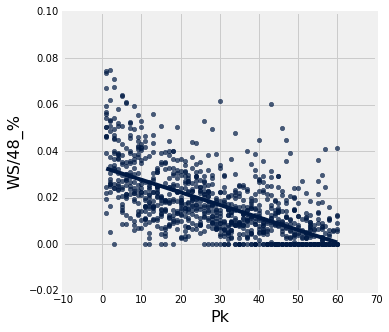

In [126]:
def to_int(s):
    return int(s)

win_shares = draft_data.select(['Year','Pk', 'Player', 'WS/48']).sort('Pk')
pk = win_shares.apply(to_int, 'Pk')
win_shares['Pk'] = pk.astype(np.float)

ws = win_shares.column('WS/48')
ws[ws == ''] = 0
win_shares['WS/48'] = ws.astype(np.float)

win_shares_sum_by_year = win_shares.group('Year', np.sum)
win_shares_min_by_year = win_shares.group('Year', np.min)

win_shares = win_shares.join('Year', win_shares_sum_by_year).select(['Year', 'Pk', 'WS/48', 'WS/48 sum'])
win_shares = win_shares.with_column('WS/48_%', win_shares.column(2) / win_shares.column(3))

# win_shares_sum_by_year.show(1)
# win_shares_min_by_year.show(1)
# win_shares.show(10)

win_shares.select(['Pk', 'WS/48_%']).scatter('Pk', overlay=True, fit_line=True)